# **CROP YIELD PREDICTION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df = pd.read_csv('/drive/MyDrive/cropYieldPrediction/dataset/finalised_dataset_x2.csv',na_values='=')
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17855,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
17856,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
17857,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
17858,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


In [ ]:
df.shape

(17860, 17)

In [ ]:
df.columns

Index(['Unnamed: 0', 'state_names', 'district_names', 'crop_year',
       'season_names', 'crop_names', 'area', 'temperature', 'wind_speed',
       'pressure', 'humidity', 'soil_type', 'N', 'P', 'K', 'production',
       'Yield'],
      dtype='object')

In [ ]:
df=df.drop('Yield', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17860 entries, 0 to 17859
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17860 non-null  int64  
 1   state_names     17860 non-null  object 
 2   district_names  17860 non-null  object 
 3   crop_year       17860 non-null  int64  
 4   season_names    17860 non-null  object 
 5   crop_names      17860 non-null  object 
 6   area            17860 non-null  float64
 7   temperature     17860 non-null  float64
 8   wind_speed      17860 non-null  float64
 9   pressure        17860 non-null  float64
 10  humidity        17860 non-null  float64
 11  soil_type       17860 non-null  object 
 12  N               17860 non-null  float64
 13  P               17860 non-null  float64
 14  K               17860 non-null  float64
 15  production      17712 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 2.2+ MB


In [ ]:
df = df[df['state_names'] == "Maharashtra"]
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17855,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
17856,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
17857,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
17858,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17860 entries, 0 to 17859
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17860 non-null  int64  
 1   state_names     17860 non-null  object 
 2   district_names  17860 non-null  object 
 3   crop_year       17860 non-null  int64  
 4   season_names    17860 non-null  object 
 5   crop_names      17860 non-null  object 
 6   area            17860 non-null  float64
 7   temperature     17860 non-null  float64
 8   wind_speed      17860 non-null  float64
 9   pressure        17860 non-null  float64
 10  humidity        17860 non-null  float64
 11  soil_type       17860 non-null  object 
 12  N               17860 non-null  float64
 13  P               17860 non-null  float64
 14  K               17860 non-null  float64
 15  production      17712 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 2.2+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
state_names,0
district_names,0
crop_year,0
season_names,0
crop_names,0
area,0
temperature,0
wind_speed,0
pressure,0


In [ ]:
df = df[df['crop_year']>=2004]
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production
268,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200.0,20.768143,2.002031,1013.280471,20.427922,peaty,10.500,27.300,27.300,4800.0
269,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500.0,20.722713,2.105239,1015.061641,20.468584,silty,39.720,105.920,52.960,143400.0
270,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300.0,21.419190,2.046843,1015.770055,21.836158,peaty,8.008,8.008,0.000,3900.0
271,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100.0,20.425919,2.024060,1013.971163,21.028403,sandy,5.824,14.560,5.824,100.0
272,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400.0,20.823344,1.989898,1015.453191,20.340815,silty,0.000,0.000,0.000,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17855,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0
17856,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0
17857,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0
17858,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10215 entries, 268 to 17859
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10215 non-null  int64  
 1   state_names     10215 non-null  object 
 2   district_names  10215 non-null  object 
 3   crop_year       10215 non-null  int64  
 4   season_names    10215 non-null  object 
 5   crop_names      10215 non-null  object 
 6   area            10215 non-null  float64
 7   temperature     10215 non-null  float64
 8   wind_speed      10215 non-null  float64
 9   pressure        10215 non-null  float64
 10  humidity        10215 non-null  float64
 11  soil_type       10215 non-null  object 
 12  N               10215 non-null  float64
 13  P               10215 non-null  float64
 14  K               10215 non-null  float64
 15  production      10087 non-null  float64
dtypes: float64(9), int64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
df['Yield'] = df['production']/df['area']
df

<ipython-input-14-d1764dfb6114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yield'] = df['production']/df['area']


,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
268,125403,Maharashtra,AHMEDNAGAR,2004,Kharif,Arhar/Tur,12200.0,20.768143,2.002031,1013.280471,20.427922,peaty,10.500,27.300,27.300,4800.0,0.393443
269,125404,Maharashtra,AHMEDNAGAR,2004,Kharif,Bajra,240500.0,20.722713,2.105239,1015.061641,20.468584,silty,39.720,105.920,52.960,143400.0,0.596258
270,125405,Maharashtra,AHMEDNAGAR,2004,Kharif,Groundnut,5300.0,21.419190,2.046843,1015.770055,21.836158,peaty,8.008,8.008,0.000,3900.0,0.735849
271,125406,Maharashtra,AHMEDNAGAR,2004,Kharif,Jowar,100.0,20.425919,2.024060,1013.971163,21.028403,sandy,5.824,14.560,5.824,100.0,1.000000
272,125407,Maharashtra,AHMEDNAGAR,2004,Kharif,Maize,11400.0,20.823344,1.989898,1015.453191,20.340815,silty,0.000,0.000,0.000,14000.0,1.228070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17855,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
17856,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
17857,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
17858,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


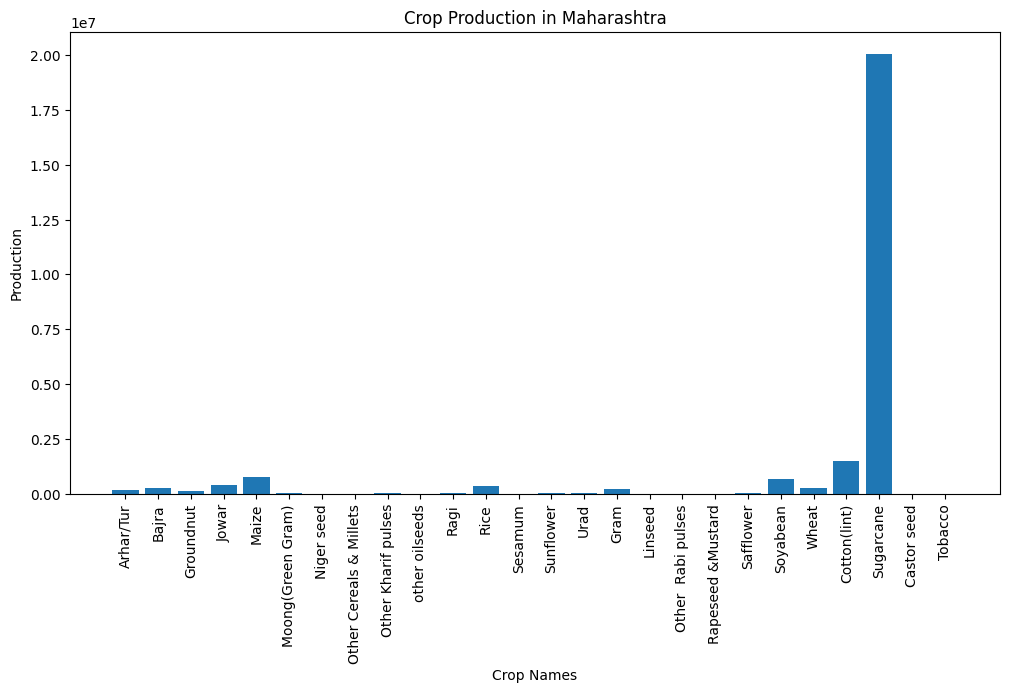

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of crop_names and production
plt.figure(figsize=(12, 6))
plt.bar(df['crop_names'], df['production'])
plt.xlabel('Crop Names')
plt.ylabel('Production')
plt.title('Crop Production in Maharashtra')
plt.xticks(rotation=90)
plt.show()

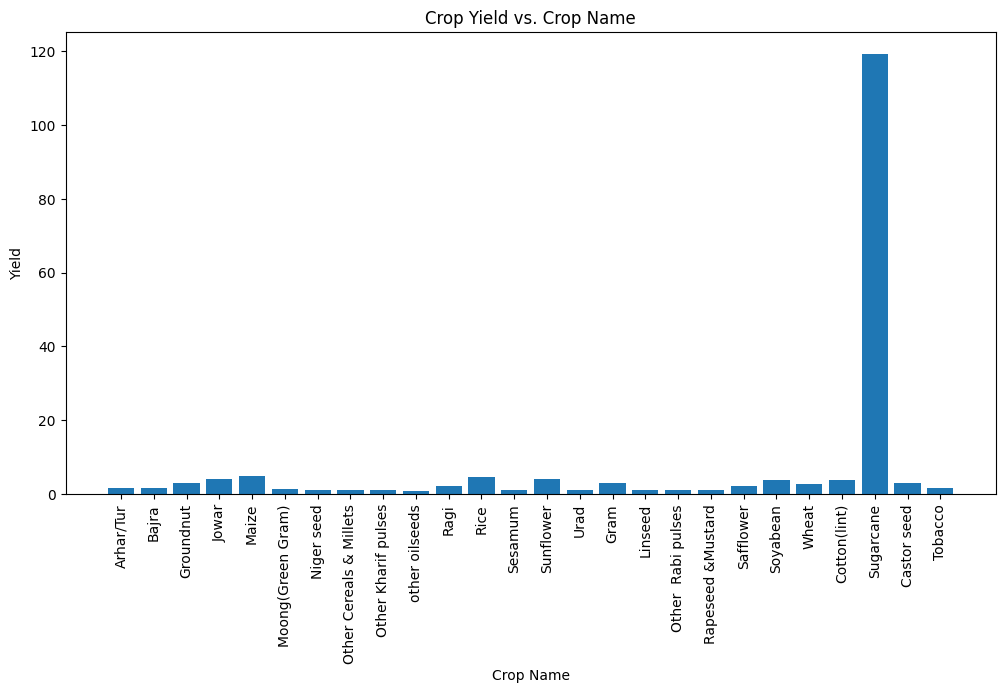

In [ ]:
# Scatter plot of area and yield
plt.figure(figsize=(12, 6))
plt.bar(df['crop_names'], df['Yield'])
plt.xlabel('Crop Name')
plt.ylabel('Yield')
plt.title('Crop Yield vs. Crop Name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = df[df['crop_names'] == 'Rice']
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
279,125414,Maharashtra,AHMEDNAGAR,2004,Kharif,Rice,8000.000000,20.062437,2.022204,1013.880858,21.320676,silty,52.080000,0.000000,0.000000,5800.000000,0.725000
280,125414,Maharashtra,AHMEDNAGAR,2004,Kharif,Rice,8000.000000,20.062437,2.022204,1013.880858,21.320676,silty,52.080000,0.000000,0.000000,5800.000000,0.725000
281,125414,Maharashtra,AHMEDNAGAR,2004,Kharif,Rice,7942.389246,19.947616,2.014493,1013.000631,21.525079,silty,52.071318,0.000000,0.000000,5810.879062,0.731629
282,125414,Maharashtra,AHMEDNAGAR,2004,Kharif,Rice,7893.539503,20.002309,2.015096,998.523739,21.335293,silty,52.177091,0.000000,0.000000,5668.134624,0.718073
283,125414,Maharashtra,AHMEDNAGAR,2004,Kharif,Rice,7953.082114,19.720852,2.029503,1030.683555,21.652655,silty,52.247061,0.000000,0.000000,5875.800866,0.738808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17834,137797,Maharashtra,YAVATMAL,2013,Kharif,Rice,99.074345,21.758817,2.028891,1030.854725,20.758341,chalky,41.484952,111.118128,56.383692,NaN,NaN
17835,137797,Maharashtra,YAVATMAL,2013,Kharif,Rice,99.849129,22.577969,2.018946,1009.442632,20.403968,chalky,41.935872,110.422323,55.518665,NaN,NaN
17836,137797,Maharashtra,YAVATMAL,2013,Kharif,Rice,100.629222,21.987728,2.007194,1022.186234,20.378300,chalky,41.533410,110.958330,56.127746,NaN,NaN
17837,137797,Maharashtra,YAVATMAL,2013,Kharif,Rice,98.808962,21.876133,2.016154,1034.549619,20.734034,chalky,42.393257,114.367682,57.098004,NaN,NaN


In [ ]:
# List of columns to drop
columns_to_drop = ['district_names', 'season_names', 'state_names', 'soil_type', 'Unnamed: 0','crop_names']

# Drop columns if they exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

df = df.sort_values(by='crop_year')
df


,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,Yield
279,2004,8000.000000,20.062437,2.022204,1013.880858,21.320676,52.080000,0.000000,0.0,5800.000000,0.725000
4508,2004,5090.967123,19.893302,2.028856,1024.721592,20.924987,6.594920,16.751207,0.0,5471.785643,1.074803
14011,2004,18301.410150,21.084876,2.081452,1040.030526,21.548167,4.527884,4.580856,0.0,43548.861700,2.379536
14010,2004,16986.884910,20.770726,2.103856,1006.794861,21.348172,4.510240,4.571190,0.0,45324.962990,2.668233
14009,2004,17954.581450,21.072825,2.085828,1026.931787,21.286605,4.548455,4.436135,0.0,43626.488010,2.429825
...,...,...,...,...,...,...,...,...,...,...,...
4224,2014,141800.000000,21.196229,1.986877,1015.973558,21.133809,0.000000,0.000000,0.0,106700.000000,0.752468
4225,2014,141800.000000,21.196229,1.986877,1015.973558,21.133809,0.000000,0.000000,0.0,106700.000000,0.752468
4226,2014,140590.819500,20.935814,1.972744,1019.207195,21.115864,0.000000,0.000000,0.0,106582.506800,0.758104
12147,2014,300.000000,21.635556,2.075023,1015.181165,21.619051,0.000000,15.712000,0.0,NaN,NaN


In [ ]:
df = df.fillna(df.mean())

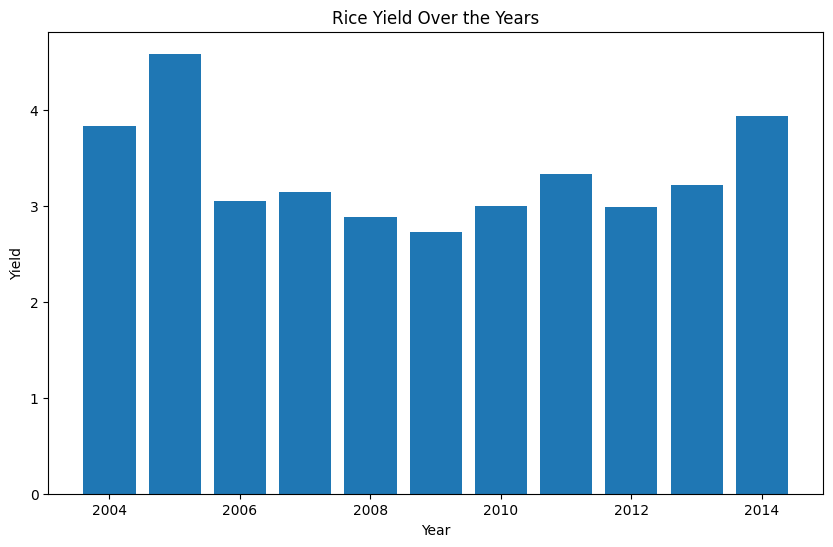

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR

plt.figure(figsize=(10, 6))
plt.bar(df['crop_year'], df['Yield'])
plt.title('Rice Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

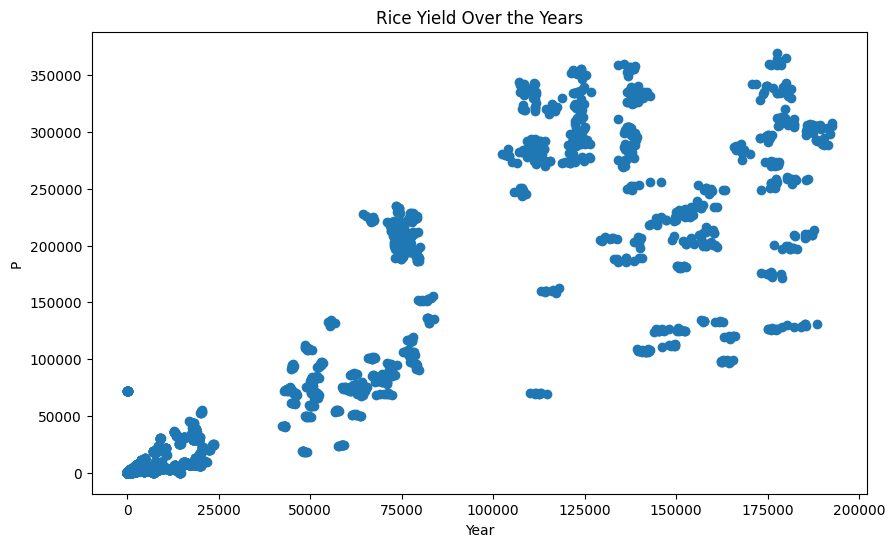

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['production'])
plt.title('Rice Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('P')
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Different Features', y=1.02)
plt.show()


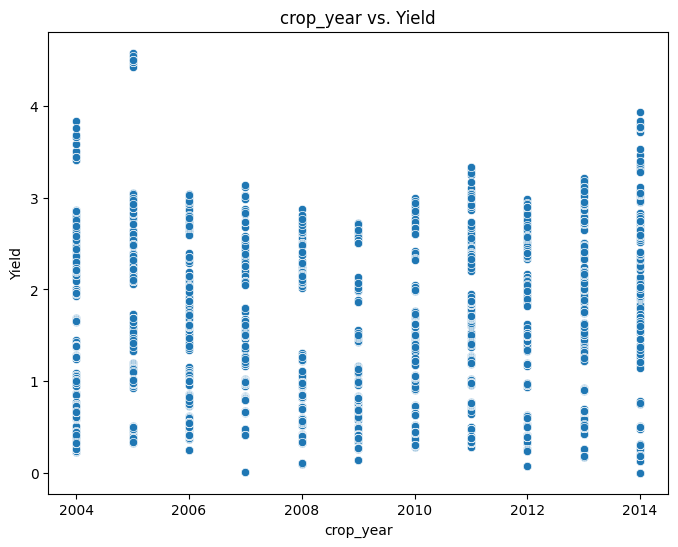

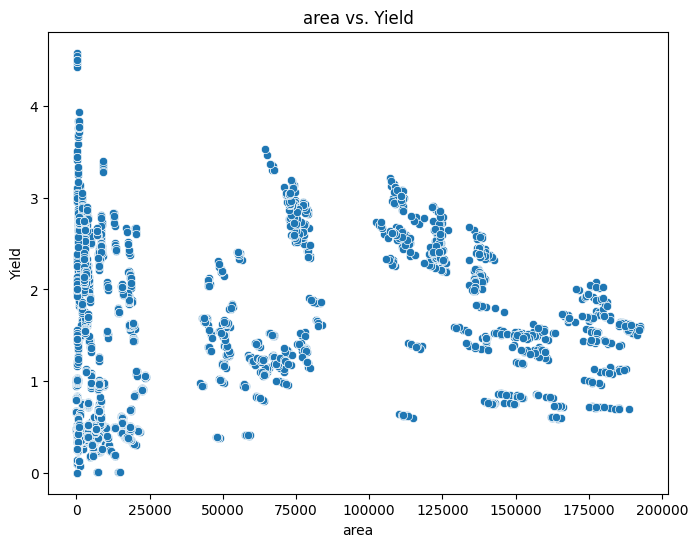

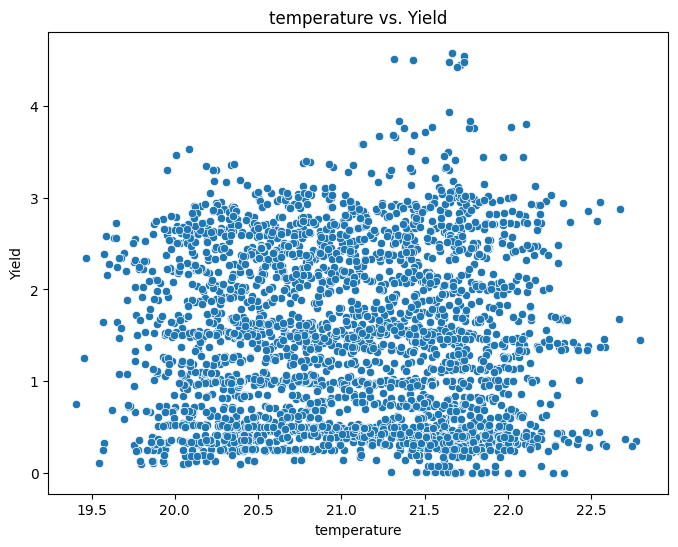

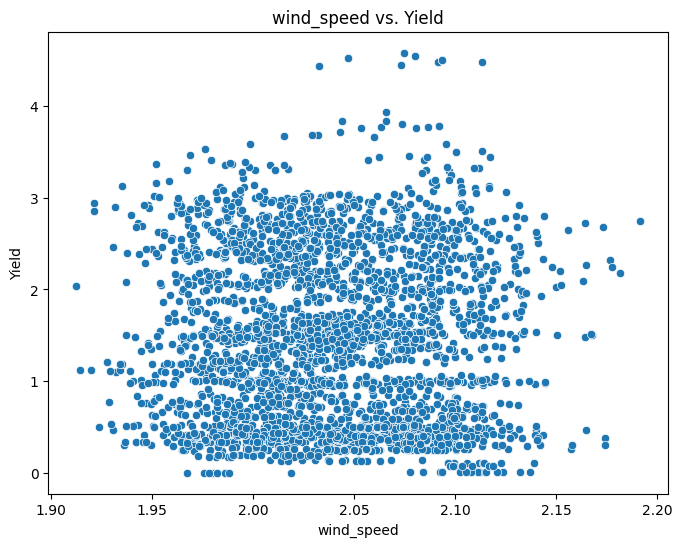

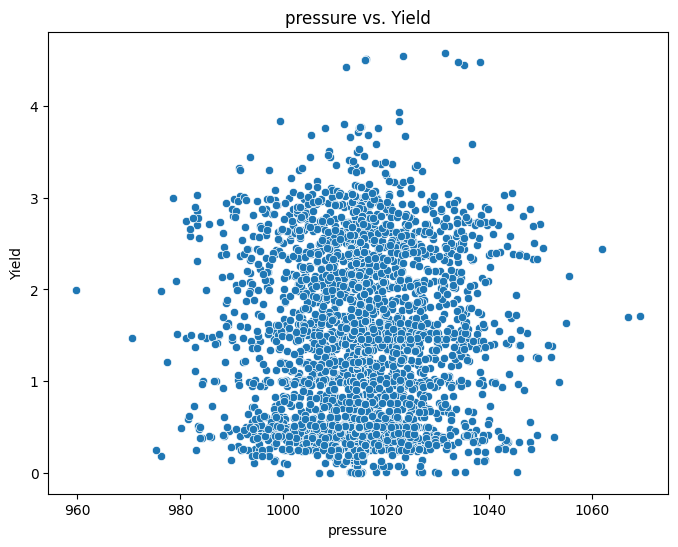

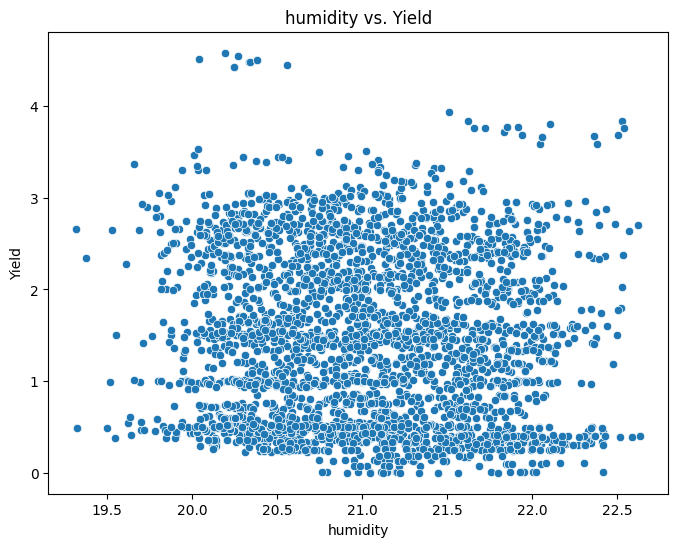

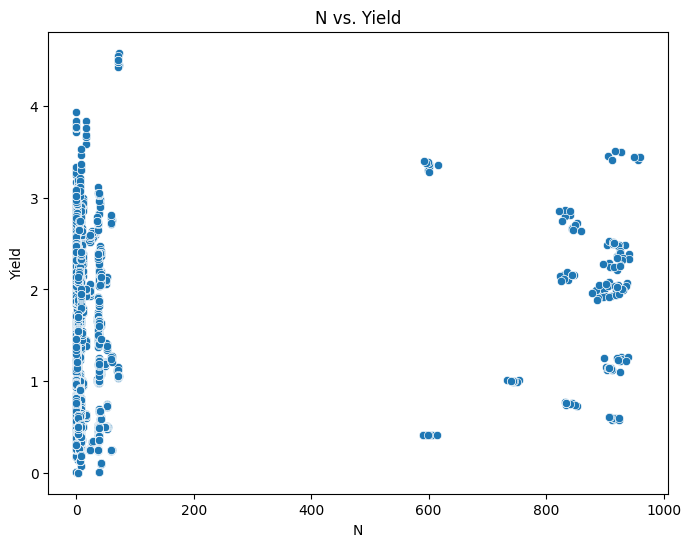

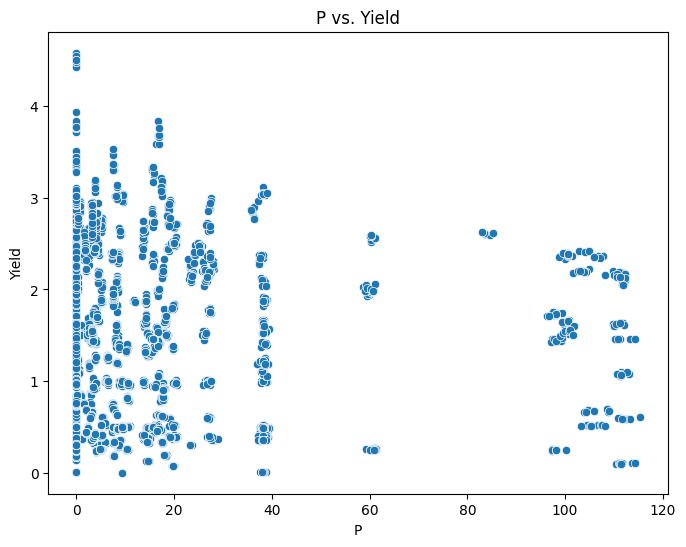

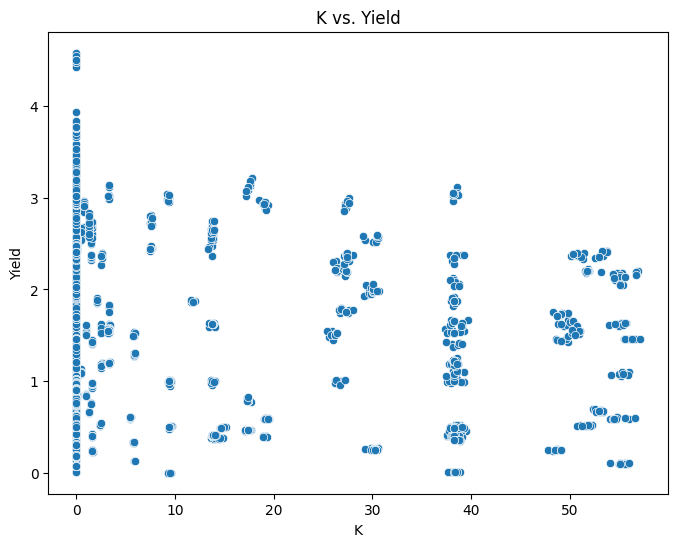

In [ ]:
for feature in df.columns[:-2]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Yield', data=df)
    plt.title(f'{feature} vs. Yield')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select the relevant features for modeling (e.g., area, temperature, wind_speed, etc.)
features = ['area','temperature', 'wind_speed', 'pressure', 'humidity', 'N', 'P', 'K']
target = 'Yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
X_train

,area,temperature,wind_speed,pressure,humidity,N,P,K
12484,64596.190110,21.718610,1.989198,1013.107855,21.014765,909.960182,0.000000,0.000000
12014,3933.184473,21.884791,1.998064,1000.455090,20.079149,1.779750,0.000000,0.000000
12152,294.641243,21.741960,2.083054,1018.512000,21.692335,0.000000,15.885455,0.000000
15721,100.000000,20.510939,2.096232,1013.876197,20.189010,35.742000,0.000000,0.000000
13528,200.000000,21.638794,2.100298,1014.291823,20.747208,928.372000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
10696,498.229420,21.086986,2.077884,1008.882819,20.679994,7.608910,19.971522,0.000000
390,87.126403,21.162775,1.959545,1020.291707,21.941885,49.107610,0.000000,0.000000
14714,490.238527,21.354896,2.058831,1026.110877,21.679421,2.791027,0.000000,0.000000
1309,8500.000000,20.421590,1.987171,1014.639225,21.003649,3.150000,0.000000,0.000000


In [ ]:
X_test

,area,temperature,wind_speed,pressure,humidity,N,P,K
4533,5100.000000,20.987111,2.070614,1015.965755,20.577738,1.596000,3.990000,1.596000
8401,3104.988643,20.325778,2.047963,1005.758738,21.973614,0.000000,3.113701,0.000000
14684,44864.936960,21.520322,1.978212,1006.418334,21.643538,38.813168,37.974926,38.241027
8393,3200.000000,20.530259,2.007600,1014.073161,21.309258,0.000000,3.104000,0.000000
9795,795.763017,19.871550,2.056216,1010.448545,21.303540,5.756458,14.717201,5.879209
...,...,...,...,...,...,...,...,...
9006,57166.943380,21.972110,1.989735,1032.237820,21.812705,6.256325,16.345808,0.000000
4739,7584.471693,21.732028,2.037604,1041.108850,20.274124,0.000000,0.000000,0.000000
14332,16016.614360,21.935799,1.958832,1029.864130,20.019789,919.070382,0.000000,0.000000
9641,5597.654441,21.608490,2.047368,1009.038053,21.080059,7.349944,0.000000,0.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2) Score: {r2}")
print(f"Accuracy of Random Forest: {accuracy:.2f}%")

Mean Squared Error: 0.1020233807592228
Mean Absolute Percentage Error (MAPE): 521312122519683.31%
R-squared (R2) Score: 0.8734687019153901
Accuracy of Random Forest: 87.35%


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
xgboost_modl = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgboost_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2) Score: {r2}")
print(f"Accuracy of XGBoost: {accuracy:.2f}%")

Mean Squared Error: 0.5940854822478234
Mean Absolute Percentage Error (MAPE): 873893989381946.12%
R-squared (R2) Score: 0.2632041137762112
Accuracy of XGBoost: 26.32%


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=[('rf', model), ('xgb', xgboost_model)], final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate accuracy (using R2 value)
accuracy = min(r2 * 100, 100)
print("Accuracy:", accuracy, "%")

In [ ]:
df.columns

In [ ]:
def predict_yieldX(area, temperature, wind_speed, pressure, humidity, N, P, K):
    # Create a new DataFrame with the input features
    input_data = pd.DataFrame({
        'area': [area],
        'temperature': [temperature],
        'wind_speed': [wind_speed],
        'pressure': [pressure],
        'humidity': [humidity],
        'N': [N],
        'P': [P],
        'K': [K]
    })

    # Make predictions using the trained model
    predicted_yield1 = xgboost_model.predict(input_data)
    predicted_yield2 = model.predict(input_data)
    predicted_yield = (predicted_yield1[0] + predicted_yield2[0])/2

    return predicted_yield



In [ ]:
area = 79689.360576
temperature = 21.869168
wind_speed = 2.027857
pressure = 996.662884
humidity = 21.738965
N = 39.193203
P = 107.072300
K = 52.581657

predicted_yield_xgboost = predict_yieldX(area, temperature, wind_speed, pressure, humidity, N, P, K)

print(f"Predicted Yield: {predicted_yield_xgboost:.2f} tons/hect")

In [ ]:
df2 = pd.read_csv('/drive/MyDrive/cropYieldPrediction/dataset/rice_crop_root_dataset.csv',na_values='=')
df2

In [ ]:
df2.columns

In [ ]:
# List of columns to drop
columns_to_drop = ['Water_Availability','Rice_Variety','Planting_Density', 'Water_Management',]

# Drop columns if they exist in the DataFrame
df2 = df2.drop(columns=[col for col in columns_to_drop if col in df2.columns])

df2
df2.columns


In [ ]:
# Select the relevant features for modeling (e.g., area, temperature, wind_speed, etc.)
features = ['Soil_Type', 'N', 'P', 'K', 'Temperature']
target = 'Root_Length_cm'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2[features], df2[target], test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import  mean_absolute_percentage_error

df_encoded = pd.get_dummies(df2, columns=['Soil_Type'], drop_first=True)

X = df_encoded.drop(columns=['Root_Length_cm'])
y = df_encoded['Root_Length_cm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=100)

xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred) * 100
print(f"R-squared (R2) Score: {r2}")

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
percentage = 100 - mape
print(f"Accuracy: {percentage:.2f}%")



In [ ]:
def predict_root_length(soil_type, N, P, K, temperature):
    input_data = pd.DataFrame({
        'N': [N],
        'P': [P],
        'K': [K],
        'Temperature': [temperature]
    })
    for col in X_train.columns:
        if col.startswith('Soil_Type_'):
            input_data[col] = 0

    input_data[f'Soil_Type_{soil_type}'] = 1

    missing_cols = set(X_train.columns) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0
    input_data = input_data[X_train.columns]

    predicted_root_length = xg_reg.predict(input_data)

    return predicted_root_length[0]


In [ ]:
soil_type = 'Sandy'
N = 100
P = 50
K = 30
temperature = 25


predicted_root_length = predict_root_length(soil_type, N, P, K, temperature)

print(f"Predicted Root Length: {predicted_root_length:.2f}cm")


In [ ]:
area = 3.14 * predicted_root_length*predicted_root_length
print(f"Predicted Area: {area:.2f}cm^2")

In [ ]:
import pickle
pickle.dump(model,open('RF_model.pkl', 'wb'))
pickle.dump(xgboost_model,open('model2.pkl', 'wb'))

In [ ]:
import sklearn
print(sklearn.__version__)